# Pandas

В этом задании предлагается провести небольшой анализ данных датасета [studens](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

In [13]:

import pandas as pd
%matplotlib inline

## Задание 1 ★☆☆

Считайте файл в переменную `data` определите размер таблицы.

In [17]:
data = pd.read_csv('C:\\Users\\1\\env_dmia\\DMIA_Industry_2019_Autumn\\hw02\\data\\student-mat.csv', sep=';')# TODO

In [20]:
# размер это tuple (количество строк, количество столбцов)
shape = data.shape# TODO

Значение для формы

In [21]:
print(' '.join(map(str, shape)))

395 33


Посмотрите первые пять строк

In [22]:
# TODO
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Выведите список названий столбцов

In [24]:
# TODO
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Задание 2 ★☆☆

Определите количество студентов, у которых оценка G1 выше среднего.

In [36]:
more_then_mean = sum(data['G1'] > data['G1'].mean())# TODO

Значение для формы

In [37]:
print(more_then_mean)

202


## Задание 3 ★☆☆

Определите значение для поля `absences` после сортировки по убыванию по полю `G3`, которое находится на 100 позиции после сортировки (отсчет с 0).

In [54]:
tmp = data.sort_values(by=["G3"], ascending=False)
absences_at_100 = tmp.reset_index(drop=True)['absences'][100]# TODO


Значение для формы

In [55]:
print(absences_at_100)

6


## Задание 4 ★☆☆

Определите долю студентов женского и мужского пола. 

In [66]:
# получите объект series индексы которого: F и M
girl = sum(data['sex'] == 'F') / len(data)
serires_object = pd.Series([girl, 1 - girl], index = ['F', 'M'])

Значение для формы

In [67]:
print("{:.3f} {:.3f}".format(serires_object['M'], serires_object['F']))

0.473 0.527


## Задание 5 ★★☆

Определите общее количество пропущенных значений в таблице.

In [82]:


null_count = pd.isnull(data).sum().sum()# TODO

Значение для формы

In [83]:
print(null_count)

0


## Задание 6 ★★☆

Определите уникальные значения 'Mjob', отсортируйте их по алфавиту, сопоставьте каждому значению его позицию в отсорированном списке и замените значения в таблице на его позицию. Например, если вы получили список уникальных значений ['a', 'c', 'f'], то вместо 'a' везде нужно поставить 0, вместо 'c' везде нужно поставить 1, а вместо 'f' - 
2.

In [96]:
tmp = data.sort_values(by=['Mjob'])

un = list(tmp['Mjob'].unique())
f = lambda x: un.index(x)
#f('at_home')
data['Mjob'] = data['Mjob'].apply(f)
data.head()
#data['Mjob'] = # TODO

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,0,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,0,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,0,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,1,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,2,other,...,4,3,2,1,2,5,4,6,10,10


Значение для формы

In [97]:
print(data['Mjob'].value_counts().idxmax())

2


## Задание 7 ★★☆

Сгруппируйте данные по полю 'sex' и определите среднее значение, медиану и максимальное значение оценок 'G3'.
Подсказка: agg

In [119]:
# получите data frame с соответсвующими стрками (по полю sex) и столбцами (среднее, медиана и максимум)
df_grouped = data.groupby('sex')['G3'].agg(['sum', 'median', 'mean'])# TODO
df_grouped

,sum,median,mean
sex,,,
F,2073,10,9.966346
M,2041,11,10.914439


Значение для формы

In [120]:
print("{:.3f}".format(df_grouped.sum().sum()))

4155.881


## Задание 8 ★★☆

Определите среднее количество пропусков занятий ('absences') среди студентов, каждая оценка которых ('G1', 'G2', 'G3') выше медианы.

In [132]:
fst = data['G1'] > data['G1'].median()
sec = data['G2'] > data['G2'].median()
third = data['G3'] > data['G3'].median()
total = fst & sec & third
total = total * data['absences']
mean_score_high_level = total.sum() / sum(total != 0)

Значение для формы

In [133]:
print("{:.4f}".format(mean_score_high_level))

6.5000


## Визуализация в pandas

Постройти распределение оценок 'G1'(гистограмму). Используйте методы для data frame и series.

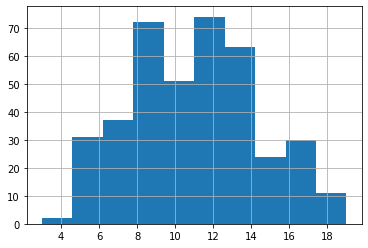

In [134]:
# TODO
data['G1'].hist()

Постройте scatter plot по признакам 'G3'и 'absences'

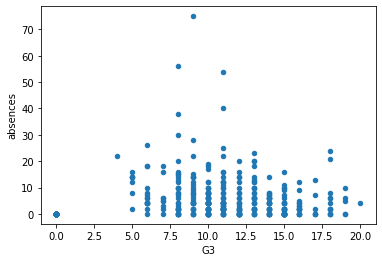

In [141]:
# TODO
data.plot.scatter(y='absences', x='G3')